In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import chess

import glob
import joblib

In [10]:
def get_current_version(model_type):
    '''
    Model_type: KNN, LR, RF, SVR
    '''
    from pathlib import Path
    import pickle

    model_file_path = f'model_{model_type}_1.joblib'
    counter = 1

    while Path(model_file_path).is_file(): # ensure that no files are overwritten
        counter += 1
        model_file_path = f'model_{model_type}_{counter}.joblib'
    
    return counter

MODEL_NUMBER = get_current_version('KNN')
MODEL_NUMBER

2

In [11]:
X_loaded = joblib.load('data_X.joblib')
y_loaded = joblib.load('data_y.joblib')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_loaded, y_loaded, test_size = 0.2, random_state = 0)

In [5]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [6]:
y_pred = knn.predict(X_test)
np.sum(np.abs(y_pred - y_test)) / len(y_test)

2.1717111328125

In [7]:
## Determine best K

from tqdm import tqdm

K_errs = []

K_range = range(1, 25+1)

for K in tqdm(K_range):
    knn_K = KNeighborsRegressor(n_neighbors = K, weights = 'distance')
    knn_K.fit(X_train, y_train)

    y_pred_k = knn_K.predict(X_test)
    err = np.sum(np.abs(y_pred_k - y_test)) / len(y_test)

    K_errs.append(errs)
    print(f"For k={K}, MAD: {err}")

  0%|          | 0/25 [00:00<?, ?it/s]

  4%|▍         | 1/25 [03:00<1:12:00, 180.03s/it]

For k=1, MAD: 2.0444281877493604


  8%|▊         | 2/25 [05:58<1:08:38, 179.07s/it]

For k=2, MAD: 1.9939948156030234


 12%|█▏        | 3/25 [08:51<1:04:35, 176.18s/it]

For k=3, MAD: 1.9986071010523876


 16%|█▌        | 4/25 [11:44<1:01:16, 175.08s/it]

For k=4, MAD: 2.0326198272852958


 20%|██        | 5/25 [14:39<58:23, 175.16s/it]  

For k=5, MAD: 2.075626335135116


 24%|██▍       | 6/25 [17:33<55:21, 174.80s/it]

For k=6, MAD: 2.118005647356715


 28%|██▊       | 7/25 [20:28<52:23, 174.63s/it]

For k=7, MAD: 2.160356549182717


 32%|███▏      | 8/25 [23:22<49:24, 174.39s/it]

For k=8, MAD: 2.202143830342637


 36%|███▌      | 9/25 [26:13<46:17, 173.59s/it]

For k=9, MAD: 2.23940492849805


 40%|████      | 10/25 [29:04<43:08, 172.59s/it]

For k=10, MAD: 2.275345025896766


 44%|████▍     | 11/25 [31:56<40:13, 172.38s/it]

For k=11, MAD: 2.3082815512307358


 48%|████▊     | 12/25 [34:49<37:25, 172.72s/it]

For k=12, MAD: 2.3404542188968387


 52%|█████▏    | 13/25 [37:41<34:29, 172.45s/it]

For k=13, MAD: 2.3699104512475366


 56%|█████▌    | 14/25 [40:34<31:39, 172.71s/it]

For k=14, MAD: 2.3959139193304506


 60%|██████    | 15/25 [43:34<29:08, 174.88s/it]

For k=15, MAD: 2.4204540427767367


 64%|██████▍   | 16/25 [46:40<26:43, 178.15s/it]

For k=16, MAD: 2.443773402809489


 68%|██████▊   | 17/25 [49:49<24:10, 181.26s/it]

For k=17, MAD: 2.4656826813092825


 72%|███████▏  | 18/25 [52:56<21:21, 183.14s/it]

For k=18, MAD: 2.4859948107555287


 76%|███████▌  | 19/25 [56:03<18:26, 184.40s/it]

For k=19, MAD: 2.5057035350762695


 80%|████████  | 20/25 [59:12<15:28, 185.66s/it]

For k=20, MAD: 2.5234689705828015


 84%|████████▍ | 21/25 [1:02:19<12:24, 186.19s/it]

For k=21, MAD: 2.5406007943605164


 88%|████████▊ | 22/25 [1:05:26<09:19, 186.44s/it]

For k=22, MAD: 2.556211395224325


 92%|█████████▏| 23/25 [1:08:33<06:12, 186.43s/it]

For k=23, MAD: 2.5710210915795835


 96%|█████████▌| 24/25 [1:11:39<03:06, 186.35s/it]

For k=24, MAD: 2.585806532452203


100%|██████████| 25/25 [1:14:45<00:00, 179.41s/it]

For k=25, MAD: 2.59913824658427


In [2]:
K_errs = [2.0444281877493604,
          1.9939948156030234,
          1.9986071010523876,
          2.0326198272852958,
          2.075626335135116,
          2.118005647356715,
          2.160356549182717,
          2.202143830342637,
          2.23940492849805,
          2.275345025896766,
          2.3082815512307358,
          2.3404542188968387,
          2.3699104512475366,
          2.3959139193304506,
          2.4204540427767367,
          2.443773402809489,
          2.4656826813092825,
          2.4859948107555287,
          2.5057035350762695,
          2.5234689705828015,
          2.5406007943605164,
          2.556211395224325,
          2.5710210915795835,
          2.585806532452203,
          2.59913824658427,
]

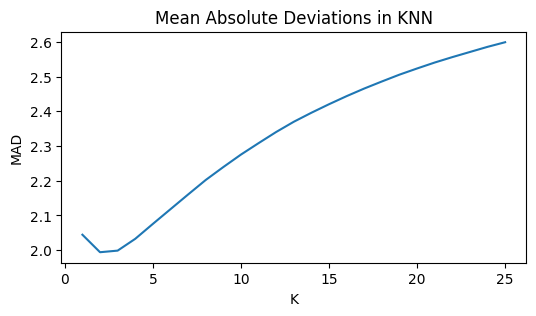

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.plot(K_range, K_errs)
plt.title(f'Mean Absolute Deviations in KNN')
plt.xlabel('K')
plt.ylabel('MAD')
plt.show()

The best K value is $K=2$.

In [14]:
knn2 = KNeighborsRegressor(n_neighbors=2)
knn2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [15]:
def predict_KNN(model, fen, move_number = 5, stochastic = True):

    board = chess.Board(fen)
    legal_moves_list = list(board.legal_moves)
    evals_list = []
    
    for move in legal_moves_list:
        
        # is_capture = board.is_capture(move)

        board.push(move)
        fen_array = fen_str_to_1d_array(board.fen())
        # print(fen_array.shape)

        pieces_counts = get_number_of_pieces(board.fen())

        inputs = np.concatenate((fen_array, pieces_counts))

        inputs = inputs.reshape(1, -1)

        eval_prediction = model.predict(inputs)

        evals_list.append(eval_prediction)

        if board.is_checkmate():
            return move # Always make a move which gives checkmate if possible.

        board.pop()

        # New portion (added 2024-04-09)
        if board.is_capture(move):
            if board.turn:
                evals_list[-1] += 0.5 # Modify to add piece value eventually
            else:
                evals_list[-1] -= 0.5 # Modify to add piece value eventually
    

    evals_list = np.array(evals_list)
    # print(evals_list)
    # print(np.array(legal_moves_list))

    sorted_indices = np.argsort(evals_list)
    
    # print(sorted_indices)

    if board.turn:
        '''
        if it's white's turn, we must reverse the array such that the highest evaluation is first
        if it's black's turn, keep the array ascending such that the lowest evaluation for the white pieces is first
        ''' 
        sorted_indices = sorted_indices[::-1]
    
    # print(np.array(legal_moves_list).shape)

    # Use the sorted indices to sort legal_moves and evals_list
    sorted_legal_moves = np.array(legal_moves_list)[sorted_indices]
    sorted_evals_list = evals_list[sorted_indices]

    if not stochastic: # if not using stochastic mode return best move
        return sorted_legal_moves[0]

    sample = np.random.random_sample()

    # print(sample)
    # print(sorted_legal_moves)

    if sample <= 0.65 or move_number > 7: # 65% chance for best move
        # print(f'playing best move')
        return sorted_legal_moves[0]
    elif sample <= 0.85 or move_number > 5: # 25% chance for second-best move
        return sorted_legal_moves[1]
    elif sample <= 0.975 or move_number > 3: #  7.5% chance for third-best move
        return sorted_legal_moves[2]
    else: # 2.5% chance for fourth-best move
        return sorted_legal_moves[3]

In [18]:
import joblib

filename = f'model_KNN_{MODEL_NUMBER}.joblib'

joblib.dump(knn2, filename, compress=3)

['model_KNN_2.joblib']

In [19]:
import joblib

model_loaded = joblib.load(f'model_KNN_{MODEL_NUMBER}.joblib')

In [20]:
def fen_str_to_1d_array(fen):
    """
    Converts a FEN string representation of a chess board to a flat tensor representation.

    Args:
        fen (str): The FEN string representing the chess board.

    Returns:
        torch.Tensor: A flat tensor representation of the chess board.

    Example:
        >>> fen_str_to_flat_tensor('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1')
        tensor([[ -4.,  -2.,  -3.,  -5.,  -6.,  -3.,  -2.,  -4.],
                [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
                [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
                [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
                [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
                [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
                [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
                [  4.,   2.,   3.,   5.,   6.,   3.,   2.,   4.]])
    """    
    # Define a mapping from pieces to integers
    piece_to_int = {
        'P': 1, 'N': 2, 'B': 3, 'R': 4, 'Q': 5, 'K': 6,
        'p': -1, 'n': -2, 'b': -3, 'r': -4, 'q': -5, 'k': -6,
    }

    # Split the FEN string into parts ## 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'
    parts = fen.split(' ')
    ranks = parts[0].split('/') # Only process the board position (the first part)

    # Convert the ranks to a list of integers
    board = []
    for rank in ranks:
        for char in rank:
            if char.isdigit():
                # If the character is a digit, add that many zeros to the board
                board.extend([0] * int(char))
            else:
                # Otherwise, add the integer representation of the piece to the board
                board.append(piece_to_int[char])

    # Convert the board to a tensor
    board_array = np.array(board, dtype='float32')

    return board_array

In [21]:
def get_number_of_pieces(fen_str):
    """
    Get the number of pieces of a given type and color on the board.

    Parameters
    ----------
    board : chess.Board
        The chess board.

    Returns
    -------
    list of int, length 10
        Number of pieces on the board (not including kings)
        [white_pawns, white_knights, ... , black_rooks, black_queens]
    """
    
    piece_counts = []
    max_starting_pieces = [8, 2, 2, 2, 1]
    values = [1, 3, 3.1, 5, 9]

    board = chess.Board(fen_str)

    for j, color in enumerate([chess.WHITE, chess.BLACK]): # 0 for white, 1 for black
        for i, piece in enumerate([chess.PAWN, chess.KNIGHT, chess.BISHOP, chess.ROOK, chess.QUEEN]):
            piece_counts.append(len(board.pieces(piece, color)) / max_starting_pieces[i] * values[i] * (-1)**j / 2) # White pieces are positive, black pieces are negative
    
    return np.array(piece_counts)

In [22]:
board = chess.Board()

import time

counter = 1
# try:
while True:
    counter += 1

    time.sleep(1)
    move = predict_KNN(model_loaded, board.fen(), move_number=counter)
    print(move)
    board.push(move[0])
    print(board)#.unicode()
# except:
#     pass

[Move.from_uci('g1h3')]
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . N
P P P P P P P P
R N B Q K B . R
[Move.from_uci('g8h6')]
r n b q k b . r
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . . . . . .
. . . . . . . N
P P P P P P P P
R N B Q K B . R
[Move.from_uci('h3g5')]
r n b q k b . r
p p p p p p p p
. . . . . . . n
. . . . . . N .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B . R
[Move.from_uci('h8g8')]
r n b q k b r .
p p p p p p p p
. . . . . . . n
. . . . . . N .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B . R
[Move.from_uci('g5h7')]
r n b q k b r .
p p p p p p p N
. . . . . . . n
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B . R
[Move.from_uci('g8h8')]
r n b q k b . r
p p p p p p p N
. . . . . . . n
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B . R


KeyboardInterrupt: 